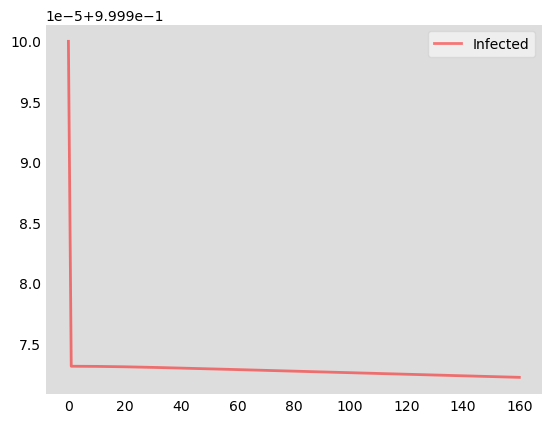

In [56]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
rt = 0.0002
T0, I0, V0, Vhat0, R0, B0, Bhat0, S0, A0 = 7392043967.547762, 1, 0, 0, rt, 0, 0, 0, 0
lamb, mu, e_r, beta, delta, e_p, p, c, k_f, k_r, k_a, k_d = 336001998.525, 1./22, 0, 2.42748116077991e-09, 1.5, 0, 4667.587407866515, 383.73753103046107, 2.8711026800655533e-10, 0.12219624536897862, 73198.78590906443, 864 
# c = (p*beta*lamb)/(delta*mu)
r01 = p*beta*lamb/(delta*mu*c)
r02 = (c*r01 + k_f*rt)/(c + k_f*rt)
t = np.linspace(0, 160, 160)
def deriv(y, t, lamb, mu, e_r, beta, delta, e_p, p, c, k_f, k_r, k_a, k_d):
    T, I, V, Vhat, R, B, Bhat, S, A = y
    dTdt = lamb - mu*T - (1-e_r)*beta*V*T
    dIdt = (1-e_r)*beta*V*T - delta*I
    dVdt = (1-e_p)*p*I - c*V - k_f*R*V + k_r*B
    dVhatdt = e_p*p*I - c*Vhat - k_f*R*Vhat + k_r*Bhat
    dRdt = -k_f*R*(V+Vhat)+k_r*(B+Bhat)-k_a*A*R+k_d*S
    dBdt = k_f*R*V - k_r*B
    dBhatdt = k_f*R*Vhat - k_r*Bhat
    dSdt = k_a*A*R - k_d*S
    dAdt = 0
    return dTdt, dIdt, dVdt, dVhatdt, dRdt, dBdt, dBhatdt, dSdt, dAdt
y0 = T0, I0, V0, Vhat0, R0, B0, Bhat0, S0, A0
ret = odeint(deriv, y0, t, args=(lamb, mu, e_r, beta, delta, e_p, p, c, k_f, k_r, k_a, k_d))
T, I, V, Vhat, R, B, Bhat, S, A = ret.T
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, I, 'r', alpha=0.5, lw=2, label='Infected')
# ax.set_xlim(0,100)
# ax.set_ylim(0,0.1)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

In [57]:
r01

1.0

In [58]:
r02

1.0

In [ ]:
delta*np.log(2)*(r02-1)